In [7]:
from itertools import combinations

def set_bits(bit_tuple):
    bits = list("00000000")
    for bit_index in bit_tuple:
        bits[int(bit_index)] = "1"
    return "".join(bits)
    

all_combinations = [set_bits(comb) for comb in combinations('01234567', 2)]

all_combinations


['00000011',
 '00000101',
 '00001001',
 '00010001',
 '00100001',
 '01000001',
 '10000001',
 '00000110',
 '00001010',
 '00010010',
 '00100010',
 '01000010',
 '10000010',
 '00001100',
 '00010100',
 '00100100',
 '01000100',
 '10000100',
 '00011000',
 '00101000',
 '01001000',
 '10001000',
 '00110000',
 '01010000',
 '10010000',
 '01100000',
 '10100000',
 '11000000']

In [9]:
from itertools import combinations

all_combinations = [f"{(1 << i) | (1 << j):08b}" for i, j in combinations(range(8), 2)]

all_combinations

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (1673651290.py, line 3)

In [3]:
import torch


torch.cuda.is_available()

False

In [4]:
import time
import sys

def print_progress_bar(iteration, total, prefix='', length=40, fill='█'):
    """Prints a progress bar that overwrites the previous one."""
    percent = (iteration / total) * 100
    filled_length = int(length * iteration // total)
    bar = fill * filled_length + '-' * (length - filled_length)
    
    # Print the progress bar
    sys.stdout.write(f'\r{prefix} |{bar}| {percent:.2f}% Complete')
    sys.stdout.flush()

def clear_progress_bar():
    """Clears the progress bar from the output."""
    sys.stdout.write('\r' + ' ' * 80 + '\r')  # Clear the line
    sys.stdout.flush()

# Example usage
total_iterations = 100

for i in range(total_iterations + 1):
    # Simulate some work
    time.sleep(0.1)
    
    # Update the progress bar
    print_progress_bar(i, total_iterations, prefix='Progress')
    
    # Simulate occasional debug information
    if i % 25 == 0 and i > 0:
        clear_progress_bar()  # Clear the progress bar before printing debug info
        print(f'Debug Info: Iteration {i} completed.')
        time.sleep(1)  # Pause to observe debug info

# Clear the final progress bar
clear_progress_bar()
print("Processing Complete!")  # Final message


Debug Info: Iteration 25 completed.                                             
Debug Info: Iteration 50 completed.                                             
Debug Info: Iteration 75 completed.                                             
Progress |████████████████████████████████--------| 80.00% Complete

KeyboardInterrupt: 

In [1]:
debug_text = "\nTarget updated\nTarget updated\nLoss: 0.0\nTarget updated"

text = "Loss: 0.2"

loc = debug_text.find(text[:5])
next_new_line = debug_text.find("\n", loc)
if next_new_line == -1:
    debug_text = debug_text[:loc-1] + "\n" + text
else:
    debug_text = debug_text[:loc-1] + debug_text[next_new_line:] + "\n" + text


In [8]:
import datetime
import os
import json

output_folder = f'outputs/{datetime.datetime.now().strftime("%H%M%S_%m%d%Y")}'
print(output_folder)
os.makedirs(output_folder)

with open(output_folder + "/paramters.json", "w") as parameters_file:
    json.dump({
        "Network_Structure": [32, 32, 32],
        "Learning Rate": 0.2,
        "Optimiser": "test",
        "Max Memory Size": 100,
        "Gamma": 0.1,
        "Epsilon0": 1.0,
        "Epsilon Decay Factor": 0.995,
        "Epsilon Min": 0.05,
        "Batch Size": 64,
        "Update Target Every": 20
    }, parameters_file)

outputs/162639_10282024


<Axes: xlabel='frame_number', ylabel='loss'>

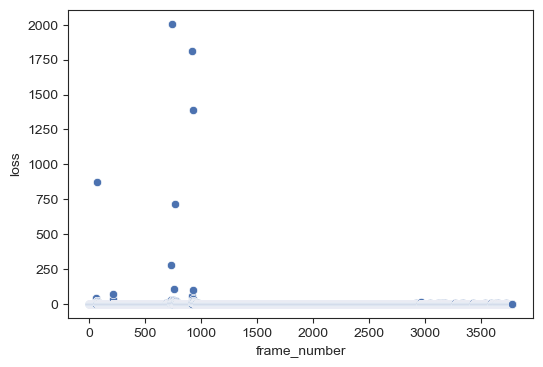

In [9]:
import os
import pandas as pd
import seaborn as sns
sns.set_theme(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)

newest_folder = sorted(os.listdir("Outputs"))[-1]
data = pd.read_csv(f"Outputs/{newest_folder}/data.csv")
sns.scatterplot(data, x="frame_number", y="loss")

In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# sns.set_theme(style="darkgrid")

newest_folder = sorted(os.listdir("Outputs"))[-1]
data = pd.read_csv(f"Outputs/{newest_folder}/data.csv")

data.head()


,loss,reward,episode,frame_number
0,0.0,0.0,0,1
1,0.0,0.0,0,2
2,0.0,0.0,0,3
3,0.0,0.0,0,4
4,0.0,0.0,0,5


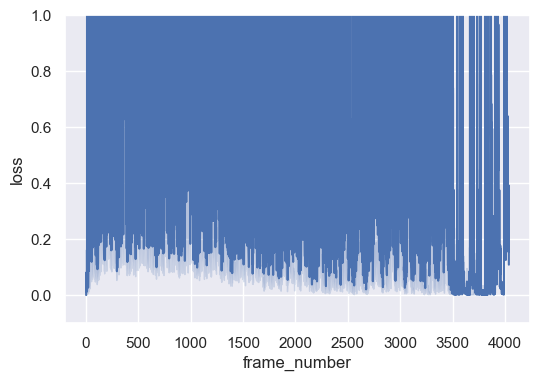

In [13]:
# Loss plot
axes = sns.lineplot(data, x="frame_number", y="loss", hue="reward", markers=True, legend=False)
# axes.set_ylim(-0.1, 3)
plt.savefig(f"Outputs/{newest_folder}/loss_over_time.svg")
plt.show()

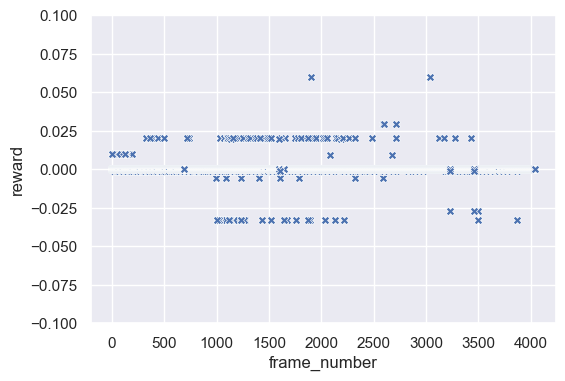

In [27]:
# Reward plot
axes = sns.scatterplot(data, x="frame_number", y="reward", marker="X", legend=False)
axes.set_ylim(-0.1, 0.1)
plt.savefig(f"Outputs/{newest_folder}/reward_over_time.svg")
plt.show()

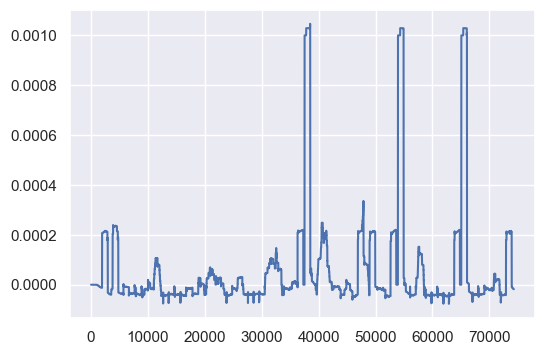

In [33]:
import numpy as np
window_width = 1000
cumsum_vec = np.cumsum(np.insert(data["reward"], 0, 0)) 
ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width
plt.plot(ma_vec)

In [57]:
data = np.arange(1, 20)
print(len(data))
window_width = 5
data = np.convolve(data, np.ones(window_width), 'valid') / window_width
data = np.append(np.zeros(int(window_width/2)), data)
data = np.append(data, np.zeros(int(window_width/2)))
print(data)
print(np.arange(1, 20))
print(len(data))

[ 0.  0.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.  0.
  0.]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [14]:
import torch
rewards = np.arange(1, 10)
rewards = torch.tensor(rewards, dtype=torch.float32)
print(rewards)

gamma = 0.95
n_step = 3
 # Calculate n-step returns for more stable training
n_step_rewards = rewards.clone()  # Copy of original rewards tensor
for i in range(1, n_step):  # For n-steps, calculate gamma-discounted reward
    n_step_rewards[:-i] += gamma ** (i) * rewards[i:]
print(n_step_rewards)

tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.])
tensor([ 5.6075,  8.4600, 11.3125, 14.1650, 17.0175, 19.8700, 22.7225, 16.5500,
         9.0000])


In [ ]:

target_q_values = n_step_rewards + (gamma ** n_step * next_q_values * ~dones)